In [59]:
optimizers = ['statistics', 'inmemory', 'parallel']
queries = [str(s) for s in [1,3,5,6,18,22]]

In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
import glob
import numpy as np

In [61]:
reports = glob.glob('*.csv')

In [62]:
# q22_m011_ion_von.csv

scores = {}
for r in reports:
    with open(r, 'r') as fh:
        query = r.split('_')[0][1:]
        mod = r.split('_')[1][1:]
        indexing = r.split('_')[2][1:]
        material = r.split('_')[3][1:-4]
        if not query in scores:
            scores[query] = {}
        scores[query][(mod, indexing, material)] = [float(l) for l in fh.readlines()]

# All Trials
Each vertical represents a different set of optimizations. Red when indexed.

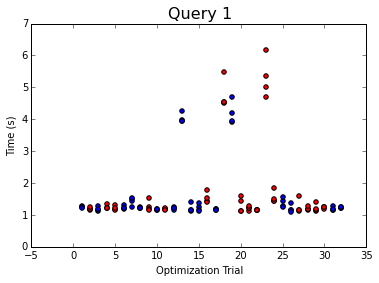

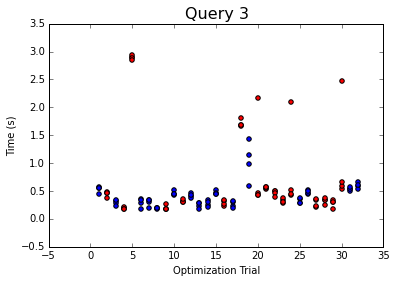

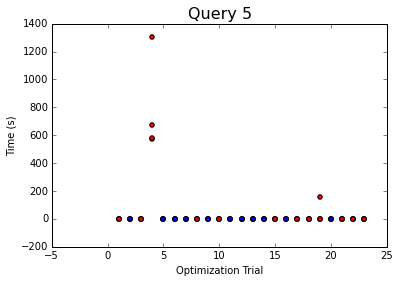

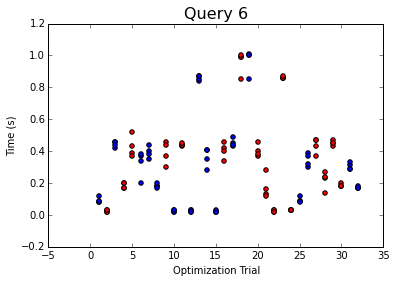

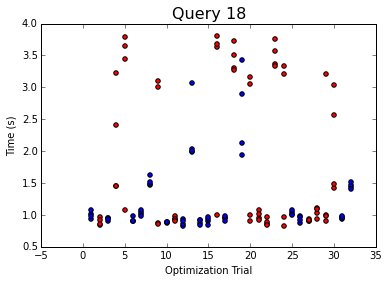

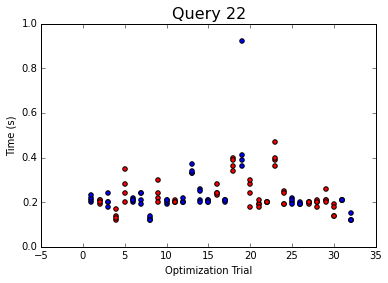

In [63]:
for q in queries:
    j = 0
    for (m, i, v) in scores[q]:
        j += 1
        plt.scatter(x=[j]*(len(scores[q][(m, i, v)])-1), y=scores[q][(m, i, v)][1:], c=['b','r'][i=='on'])
    plt.title('Query {}'.format(q), fontsize="16")
    plt.xlabel('Optimization Trial')
    plt.ylabel('Time (s)')
    plt.show()

# Average Trial Results
The results of the trials (5 each), averaged.

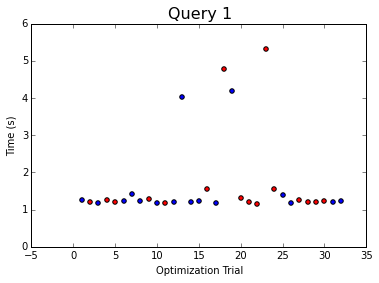

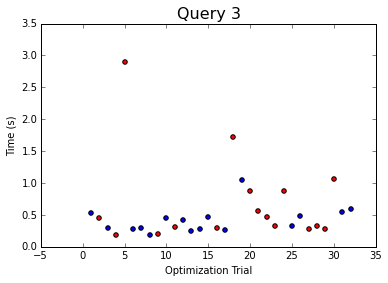

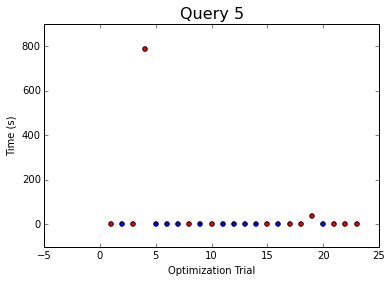

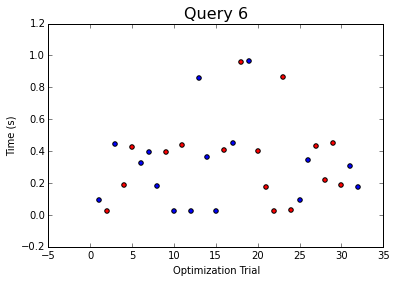

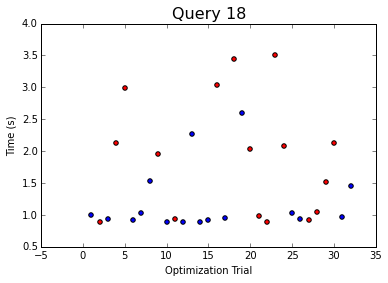

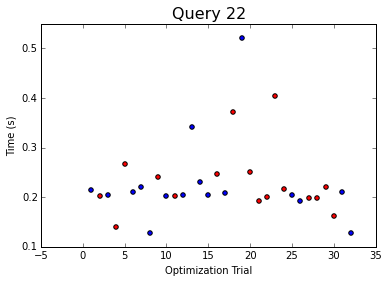

In [64]:
for q in queries:
    j = 0
    for (m, i, v) in scores[q]:
        j += 1
        plt.scatter(x=[j], y=np.mean(scores[q][(m, i, v)][1:]), c=['b','r'][i=='on'])
    plt.title('Query {}'.format(q), fontsize="16")
    plt.xlabel('Optimization Trial')
    plt.ylabel('Time (s)')
    plt.savefig('pngs/q{}'.format(q, m, i, v), bbox_inches='tight')
    plt.show()
    

In [66]:
def decode_opts((opts, ind, mat)):
    results = []
    states = ['off', 'on ']
    for c in range(len(opts)):
        results.append(optimizers[c] + " " + states[int(opts[c])])
    results.append("Indexes " + ind)
    results.append("MatViews " + mat)
    return "\t".join(results)
        

for q, d in scores.iteritems():
    min_so_far = 999
    winner = None
    for (m, i, v), times in d.iteritems():
        time = np.mean(times[1:])
        if time < min_so_far:
            min_so_far = time
            winner = (m, i, v)
    print "The best settings for query {} took ≈{}s:\n\t {}".format(q, min_so_far, decode_opts(winner))

The best settings for query 22 took ≈0.1275s:
	 statistics on 	inmemory off	parallel on 	Indexes off	MatViews on
The best settings for query 18 took ≈0.8825s:
	 statistics off	inmemory off	parallel on 	Indexes off	MatViews off
The best settings for query 1 took ≈1.1425s:
	 statistics off	inmemory off	parallel on 	Indexes on	MatViews off
The best settings for query 3 took ≈0.1875s:
	 statistics on 	inmemory off	parallel on 	Indexes off	MatViews on
The best settings for query 5 took ≈0.015s:
	 statistics on 	inmemory on 	parallel off	Indexes off	MatViews on
The best settings for query 6 took ≈0.0225s:
	 statistics off	inmemory on 	parallel off	Indexes off	MatViews off
